In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score)

import tensorflow as tf

In [3]:
def fn_plot_tf_hist(hist_df : pd.DataFrame):
    '''
    Note this function is specifically designed to plot Tensorflow training output
    Args:
      hist_df : pandas DataFrame with four columns
                For 'x' values, we will use index
                first column is accuracy
                Second column is loss
                third column is val_accuracy
                fourth column is val_loss
    '''
    fig, axes = plt.subplots(1,2 , figsize = (15,6)) # instantiate plot

    # properties  matplotlib.patch.Patch 
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    
    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y4] == hist_df[y4].min()]
 
    ax = axes[0]

    hist_df.plot(y = [y2,y4], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot
    
    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy()-1, best[y4].to_numpy()[0]), # location of text 
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.set_title('Errors')
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y1, y3], ax = ax, colormap=CMAP)
    
    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy()-1, best[y3].to_numpy()[0]), # location of text 
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow
    
    
    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.legend(loc = 'lower left')
    
    plt.tight_layout()

In [4]:
RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production


EPOCHS = 100 # number of cycles to run
ALPHA = 0.001 # learning rate
WEIGHT_DECAY = 0.001
BATCH_SIZE = 32
TRAIN_SIZE = BATCH_SIZE * 9

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (9,9),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

plt.rcParams.update(params) # update rcParams
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [5]:
data_df = pd.read_csv('ionosphere.data', header = None)
data_df.shape

(351, 35)

In [6]:
X = data_df.drop(data_df.columns[-1], axis = 1).to_numpy()

y = data_df[data_df.columns[-1]].to_numpy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=TRAIN_SIZE,
                                                    stratify=y, 
                                                    random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((288, 34), (63, 34), (288,), (63,))

In [8]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)

y_test = le.fit_transform(y_test)

In [9]:
class_name = list(le.classes_)
class_name

['b', 'g']

In [10]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform(X_test)

In [11]:
# Some model functions
rate1 = 0.05
rate2 = 0.15
rate3 = 0.25

initalizar = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)


model1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer( shape =(34,) ),
    # Set 1
    tf.keras.layers.Dense (26,  
                          kernel_initializer=initalizar),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.Dropout(rate1, seed = RANDOM_STATE),

    # Set 2
    tf.keras.layers.Dense (18,
                          kernel_initializer=initalizar),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.Dropout(rate2, seed = RANDOM_STATE),

    # Set 3
    tf.keras.layers.Dense (10,
                           kernel_initializer=initalizar),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.Dropout(rate3, seed = RANDOM_STATE),
    
    # Output Layer
    tf.keras.layers.Dense(2),
])


In [27]:
chkpt_filepath = 'all_in.weights.h5'

In [29]:
EPOCHS = 500
PATIENCE= 20
LR_PATIENCE=10
LR_FACTOR= 0.1

model_chkpt= tf.keras.callbacks.ModelCheckpoint(
    chkpt_filepath,
    monitor='val_loss',
    verbose=2,
    save_best_only=True,
    save_weights_only=True)

escb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=PATIENCE,
    verbose=2,
    restore_best_weights=True)

lrcb =  tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=LR_FACTOR,
    patience=LR_PATIENCE,
    verbose=2,
    min_lr=1e-5,
)

In [31]:
 # Step 1 : Loss Function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Step 2 : Optimizer 
optimizer = tf.keras.optimizers.AdamW(learning_rate=ALPHA, weight_decay=WEIGHT_DECAY)



# Step 3 : 
model1.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])

# Step 4 :
history = model1.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=(X_test, y_test),
                    callbacks=[model_chkpt,escb,lrcb])

Epoch 1/500
1/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3750 - loss: 0.8631
Epoch 1: val_loss improved from inf to 0.65202, saving model to all_in.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.3760 - loss: 0.9299 - val_accuracy: 0.5079 - val_loss: 0.6520 - learning_rate: 0.0010
Epoch 2/500
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4375 - loss: 1.0793
Epoch 2: val_loss improved from 0.65202 to 0.61065, saving model to all_in.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4561 - loss: 0.8687 - val_accuracy: 0.6984 - val_loss: 0.6106 - learning_rate: 0.0010
Epoch 3/500
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8438 - loss: 0.5194
Epoch 3: val_loss improved from 0.61065 to 0.57904, saving model to all_in.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6430 - loss: 0.6293 - val_accuracy: 0.7619 - val_loss: 0.5790 - learning_rate: 0.0010
Epoch 4/500
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7188 - loss: 0.5162

In [33]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.406250,0.928389,0.507937,0.652016,0.001
1,0.475694,0.806410,0.698413,0.610650,0.001
2,0.559028,0.670404,0.761905,0.579036,0.001
3,0.621528,0.646747,0.873016,0.552486,0.001
4,0.663194,0.631180,0.857143,0.529000,0.001


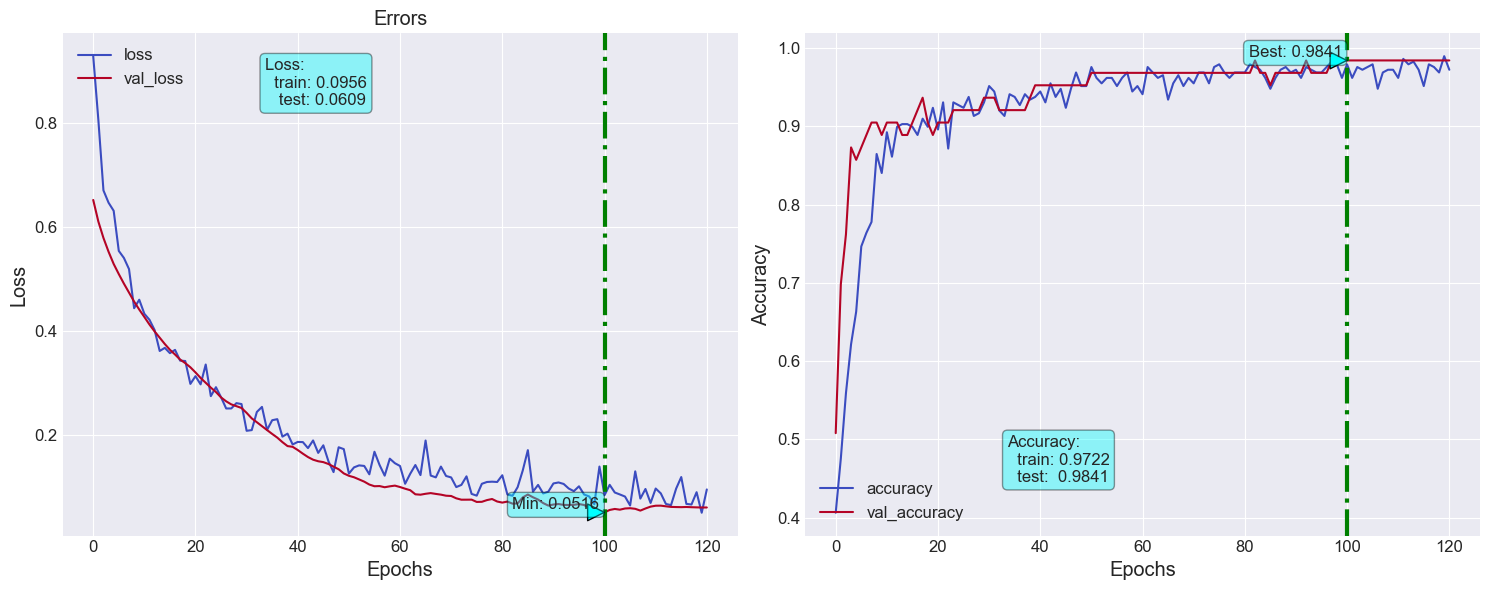

In [35]:
fn_plot_tf_hist(loss_df)

In [43]:
y_train_pred = model1.predict(X_train).argmax(axis=1)
y_test_pred= model1.predict(X_test).argmax(axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [45]:
f1_score(y_test, y_test_pred, average='weighted')

0.9841953838721952